In [3]:
import numpy as np

import pandas as pd
from pandas import Timedelta as td
import matplotlib.pyplot as plt

In [53]:
from utils.audio_to_logits import infer_character_distribution, alphabet, STEP_MS

filepath = 'audio/02-11-30-short.wav'
true_text = "with the progressive dawn the outlines of an immense camp became visible"

logits = infer_character_distribution(filepath)

In [5]:
alph = np.array(list(alphabet._str_to_label.keys()) + ['-'])
timesteps = pd.timedelta_range(start=td(0), periods=logits.shape[0], freq=td(f'{STEP_MS} ms'))
probdist = pd.DataFrame(logits,
                        index=timesteps,
                        columns=alph)
probdist

,,a,b,c,d,e,f,g,h,i,...,s,t,u,v,w,x,y,z,',-
00:00:00,0.000007,0.000027,4.621010e-07,0.000002,6.310609e-07,0.000003,4.852125e-07,0.000003,5.671518e-07,0.000009,...,0.000009,0.000009,0.000010,1.458686e-07,0.000004,1.052257e-07,0.000019,2.561006e-08,5.195279e-07,0.999885
00:00:00.020000,0.000007,0.000005,9.323957e-06,0.000002,2.363375e-06,0.000002,2.164003e-06,0.000007,1.120165e-06,0.000016,...,0.000011,0.000048,0.000007,2.362756e-07,0.000018,9.535923e-08,0.000021,1.413997e-08,3.036690e-07,0.999813
00:00:00.040000,0.000005,0.000006,1.298754e-05,0.000003,2.103514e-06,0.000003,3.529280e-06,0.000004,3.806056e-06,0.000022,...,0.000005,0.000033,0.000008,1.240120e-07,0.000025,1.720524e-08,0.000051,7.355836e-09,2.771724e-07,0.999779
00:00:00.060000,0.000003,0.000016,1.536904e-05,0.000002,1.579160e-06,0.000006,3.284241e-06,0.000001,4.978371e-06,0.000055,...,0.000003,0.000006,0.000007,4.408792e-08,0.000020,9.975881e-09,0.000059,2.312155e-09,3.776414e-07,0.999760
00:00:00.080000,0.000004,0.000026,1.754366e-05,0.000005,3.754077e-06,0.000011,6.132962e-06,0.000002,1.630594e-05,0.000045,...,0.000009,0.000018,0.000023,2.883358e-07,0.000059,1.003231e-07,0.000147,2.678794e-08,5.872891e-07,0.999520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:00:05.660000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960
00:00:05.680000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960
00:00:05.700000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960
00:00:05.720000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960


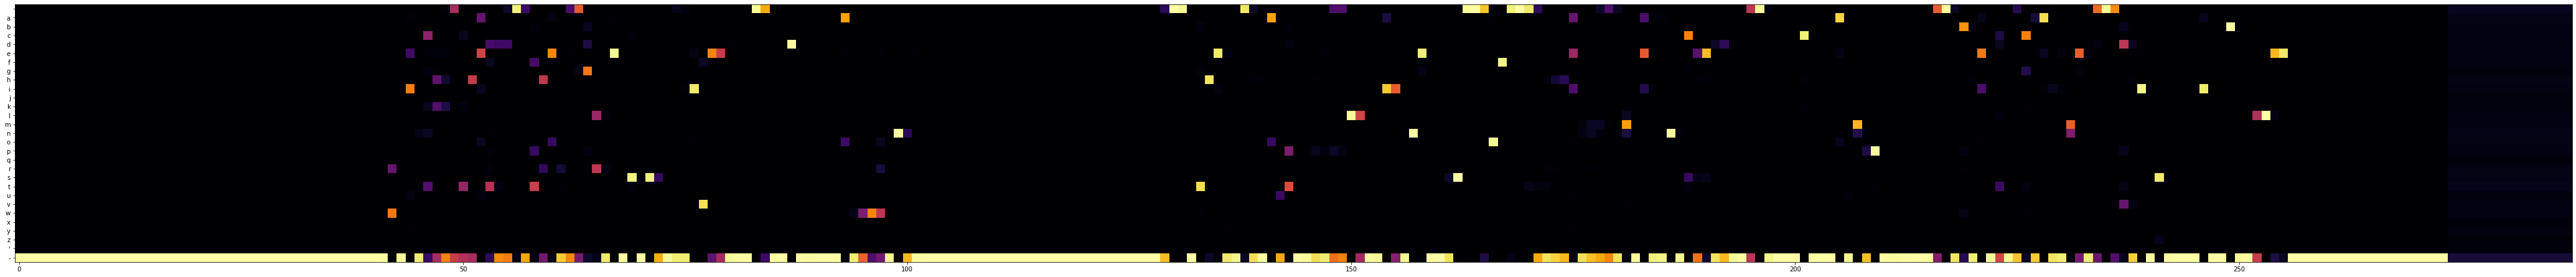

In [6]:
plt.figure(figsize=(len(probdist) / 5, 20))
plt.imshow(logits.T, cmap='inferno')
plt.yticks(np.arange(len(alph)), alph)
plt.tight_layout()
plt.show()

In [63]:
# Top three characters for every moment
top_chars = logits.argsort(axis=1)[:, ::-1]
top_n_chars = 3

top = np.hstack([
    alph[top_chars][:, :top_n_chars],
    logits[np.repeat([np.arange(top_chars.shape[0])], top_n_chars, axis=0).T, top_chars[:, :top_n_chars]].round(2)
])
top

array([['-', 'a', 'y', '1.0', '0.0', '0.0'],
       ['-', 't', 'y', '1.0', '0.0', '0.0'],
       ['-', 'y', 't', '1.0', '0.0', '0.0'],
       ...,
       ['-', ' ', 't', '0.1', '0.06', '0.05'],
       ['-', ' ', 't', '0.1', '0.06', '0.05'],
       ['-', ' ', 't', '0.1', '0.06', '0.05']], dtype='<U32')

In [7]:
from CTCDecoder.ctc_decoder import beam_search

mat = logits[:105, :]  # the progressive dawn
transcript = 'the progressive dawn'

chars = ''.join(alph[:-1])  # requires a string (without blank)

print(f"""Beam search: "{beam_search(mat, chars)}\"""")

Beam search: "wichet the gressive dawn"


In [8]:
from importlib import reload
from utils import decoder_v1

reload(decoder_v1)  # For PyCharm debugger to apply changes to the file
from utils.decoder_v1 import infer_transcript_timing, Path

mat = logits[:105, :]  # the progressive dawn
transcript = 'progressive dawn'

chars = ''.join(alph[:-1])  # requires a string (without blank)
# alph = np.array(list(chars + '-'))

paths = infer_transcript_timing(mat, chars, beam_width=50, transcript=transcript)
# paths = infer_transcript_timing(logits, chars, beam_width=30, transcript=true_text)
print(Path.get_top_paths(paths, top_n=1)[0])

best_path = Path.get_top_paths(paths, top_n=1)[0]
np.array(list(zip(best_path.path, np.array(list(transcript))[list(best_path.path)], best_path.time)))

Path(score=82.99353, path=iee  daaawwn)


array([['8', 'i', '44'],
       ['10', 'e', '46'],
       ['10', 'e', '52'],
       ['11', ' ', '56'],
       ['11', ' ', '63'],
       ['12', 'd', '64'],
       ['13', 'a', '67'],
       ['13', 'a', '76'],
       ['13', 'a', '93'],
       ['14', 'w', '96'],
       ['14', 'w', '97'],
       ['15', 'n', '99']], dtype='<U11')

In [105]:
probs = logits[:105, :-1].copy()  # the progressive dawn
# probs[:, 0] += probs[:, -1]  # mix spaces and blanks (for simplicity)

# If the model inserts a blank or a space after a character,
# prolong that character's probability so that DTW simply repeats it,
# instead of stopping the thread, for example:
#   blank  d    a    w        blank  d    a    w
#     0    0.8  0    0          0    0.8  0    0
#     0.5  0.1  0    0          0.5  0.5  0    0
#     0.8  0    0    0    ->    0.8  0.4  0    0
#     0.1  0    0.7  0          0.1  0    0.7  0
#     0    0    0    0.7        0    0    0    0.7
for i in range(1, len(probs)):
    probs[i, :-1] += probs[i, -1] * probs[i - 1, :-1]

# Surround with blanks b/c recording has silence in the beginning and at the end
# and one of assumptions of DTW is that index of one array maps onto first index of the other array
transcript = ' ' + 'with the progressive dawn' + ' '# ' with the progressive dawn '

trpt_ind_map = pd.Series(np.arange(len(alph)), index=alph)

trpt_inds = trpt_ind_map[list(transcript)].values
p_fit = probs[:, trpt_inds]

mapping = pd.DataFrame(p_fit, columns=list(transcript))
mapping

,,w,i,t,h,,t,h,e,,...,s,i,v,e,,d,a,w,n,
0,0.999891,0.000004,0.000009,0.000009,5.671518e-07,0.999891,0.000009,5.671518e-07,0.000003,0.999891,...,0.000009,0.000009,1.458686e-07,0.000003,0.999891,6.310609e-07,0.000027,0.000004,0.000001,0.999891
1,0.999821,0.000022,0.000025,0.000057,1.687216e-06,0.999821,0.000057,1.687216e-06,0.000005,0.999821,...,0.000020,0.000025,3.821182e-07,0.000005,0.999821,2.994323e-06,0.000032,0.000022,0.000003,0.999821
2,0.999785,0.000047,0.000047,0.000090,5.492908e-06,0.999785,0.000090,5.492908e-06,0.000007,0.999785,...,0.000026,0.000047,5.060477e-07,0.000007,0.999785,5.097191e-06,0.000038,0.000047,0.000006,0.999785
3,0.999765,0.000067,0.000102,0.000096,1.046998e-05,0.999765,0.000096,1.046998e-05,0.000013,0.999765,...,0.000029,0.000102,5.500162e-07,0.000013,0.999765,6.675149e-06,0.000053,0.000067,0.000008,0.999765
4,0.999525,0.000126,0.000147,0.000114,2.677095e-05,0.999525,0.000114,2.677095e-05,0.000024,0.999525,...,0.000038,0.000147,8.380902e-07,0.000024,0.999525,1.042605e-05,0.000079,0.000126,0.000019,0.999525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.843388,0.001143,0.000003,0.000046,2.309449e-05,0.843388,0.000046,2.309449e-05,0.005650,0.843388,...,0.000009,0.000003,6.023136e-05,0.005650,0.843388,8.804291e-05,0.000062,0.001143,0.989423,0.843388
101,0.991908,0.001134,0.000003,0.000054,2.321657e-05,0.991908,0.000054,2.321657e-05,0.013651,0.991908,...,0.000035,0.000003,5.976682e-05,0.013651,0.991908,9.829436e-05,0.000065,0.001134,0.981396,0.991908
102,0.997654,0.001131,0.000004,0.000069,2.578112e-05,0.997654,0.000069,2.578112e-05,0.015806,0.997654,...,0.000143,0.000004,5.968139e-05,0.015806,0.997654,1.978665e-04,0.000074,0.001131,0.978997,0.997654
103,0.999277,0.001131,0.000006,0.000075,4.181959e-05,0.999277,0.000075,4.181959e-05,0.016126,0.999277,...,0.000370,0.000006,5.970473e-05,0.016126,0.999277,4.274727e-04,0.000080,0.001131,0.978173,0.999277


In [106]:
from fastdtw import fastdtw

trpt_inds = trpt_ind_map[list(transcript)].values
dist, path = fastdtw(trpt_inds, np.arange(len(probs)), radius=50,
                     dist=lambda trpt_i, mat_i: -probs[int(mat_i), int(trpt_i)])
for i, j in path:
    print(i, j, transcript[i])

0 0  
0 1  
0 2  
0 3  
0 4  
0 5  
0 6  
0 7  
0 8  
0 9  
0 10  
0 11  
0 12  
0 13  
0 14  
0 15  
0 16  
0 17  
0 18  
0 19  
0 20  
0 21  
0 22  
0 23  
0 24  
0 25  
0 26  
0 27  
0 28  
0 29  
0 30  
0 31  
0 32  
0 33  
0 34  
0 35  
0 36  
0 37  
0 38  
0 39  
0 40  
0 41  
0 42  
0 43  
1 43 w
1 44 w
2 44 i
2 45 i
3 45 t
4 45 h
5 45  
5 46  
5 47  
5 48  
5 49  
5 50  
5 51  
5 52  
5 53  
5 54  
5 55  
5 56  
5 57  
6 57 t
6 58 t
6 59 t
7 59 h
7 60 h
8 60 e
8 61 e
9 61  
9 62  
9 63  
9 64  
9 65  
9 66  
10 66 p
11 66 r
12 66 o
13 66 g
14 66 r
15 66 e
15 67 e
15 68 e
15 69 e
16 69 s
16 70 s
16 71 s
17 71 s
17 72 s
17 73 s
17 74 s
17 75 s
18 75 i
18 76 i
18 77 i
19 77 v
19 78 v
20 78 e
20 79 e
20 80 e
21 80  
21 81  
21 82  
21 83  
21 84  
21 85  
21 86  
21 87  
21 88  
21 89  
21 90  
21 91  
21 92  
22 92 d
22 93 d
23 93 a
23 94 a
23 95 a
24 95 w
24 96 w
24 97 w
24 98 w
25 98 n
25 99 n
25 100 n
25 101 n
26 101  
26 102  
26 103  
26 104  
